From http://hanzratech.in/2015/02/24/handwritten-digit-recognition-using-opencv-sklearn-and-python.html

In [1]:
from sklearn.externals import joblib 
from sklearn import datasets 
from skimage.feature import hog 
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Training

In [2]:
# Load the dataset
dataset = datasets.fetch_mldata("MNIST Original")

In [3]:
# Extract the features and labels
features = np.array(dataset.data, 'int16') 
labels = np.array(dataset.target, 'int')

In [4]:
# Extract the hog features
list_hog_fd = []
for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

In [5]:
# Create an linear SVM object
clf = LinearSVC()

In [6]:
# Perform the training
clf.fit(hog_features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## predict

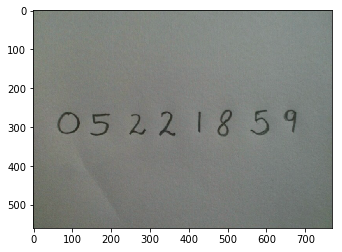

In [7]:
# Read the input image 
im = cv2.imread("../../data/handwrite-digits-1.jpg")
plt.imshow(im)

In [8]:
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

In [9]:
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

In [10]:
# Find contours in the image
ctrs = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]


In [11]:
# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [12]:
im_result = im.copy()
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im_result, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualise=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im_result, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

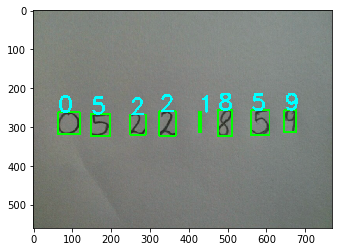

In [13]:
plt.imshow(im_result)

In [14]:
len(ctrs[0])

102

In [15]:
cv2.boundingRect(ctrs[0])

(248, 268, 41, 52)

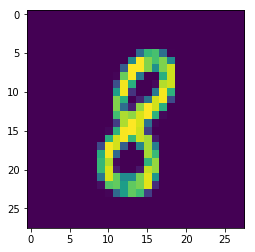

In [16]:
plt.imshow(roi)